# Thesis: Alphafold3 Prediction Analysis
---

In [28]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [2]:
# Read in data
df = pd.read_csv('../data/af3_data.csv')
hal_df = pd.read_csv('../data/hal_data.csv')

# Create SMILES dataframe with SMILES columns
smiles_cols = [col for col in df.columns if 'SMILES' in col]
smiles_df = df[['PDB_ID', 'PDB_RELEASE_DATE'] + smiles_cols]

# Create CCD dataframe with CCD columns 
ccd_cols = [col for col in df.columns if 'CCD' in col]
ccd_df = df[['PDB_ID', 'PDB_RELEASE_DATE'] + ccd_cols]

In [3]:
smiles_df.head()

,PDB_ID,PDB_RELEASE_DATE,SMILES RMSD,SMILES DOCKQ SCORE,SMILES DOCKQ iRMSD,SMILES DOCKQ LRMSD,SMILES FRACTION DISORDERED,SMILES HAS_CLASH,SMILES IPTM,SMILES PTM,SMILES RANKING_SCORE
0,5HXB,2016-06-29,0.683,0.874,0.785,1.411,0.03,0,0.86,0.84,0.87
1,5T35,2017-03-08,2.350,0.578,1.736,5.485,0.10,0,0.75,0.82,0.81
2,6BN7,2018-05-30,0.601,0.226,4.539,12.923,0.06,0,0.85,0.85,0.88
3,6BOY,2018-05-30,0.765,0.092,6.875,18.065,0.16,0,0.60,0.66,0.69
4,6HM0,2019-01-16,0.317,NaN,NaN,NaN,0.09,0,0.87,0.88,0.92


In [4]:
ccd_df.head()

,PDB_ID,PDB_RELEASE_DATE,CCD RMSD,CCD DOCKQ SCORE,CCD DOCKQ iRMSD,CCD DOCKQ LRMSD,CCD FRACTION DISORDERED,CCD HAS_CLASH,CCD IPTM,CCD PTM,CCD RANKING_SCORE
0,5HXB,2016-06-29,0.674,0.867,0.783,1.286,0.03,0,0.87,0.84,0.88
1,5T35,2017-03-08,2.000,0.629,1.471,4.559,0.09,0,0.72,0.79,0.78
2,6BN7,2018-05-30,0.716,0.674,1.134,3.446,0.06,0,0.85,86.00,0.88
3,6BOY,2018-05-30,0.643,0.426,2.259,7.594,0.12,0,0.64,0.70,0.72
4,6HM0,2019-01-16,0.397,NaN,NaN,NaN,0.08,0,0.88,0.88,0.92


In [6]:
hal_df.head()

,PDB_ID,PDB_LINK,PDB_RELEASE_DATE,AF3_DIMERS DOCKQ SCORE,AF3_DIMERS iRMSD,AF3_DIMERS LRMSD,AF3_CONTEXT DOCKQ SCORE,AF3_CONTEXT iRMSD,AF3_CONTEXT LRMSD
0,5HXB,5HXB,2016-06-29,0.840,0.848,2.165,0.027,12.608,42.404
1,5T35,5T35,2017-03-08,0.014,12.765,49.502,0.019,16.143,37.396
2,6BOY,6BOY,2018-05-30,0.020,11.618,40.270,0.021,11.201,38.396
3,6HAX,6HAX,2019-06-12,0.019,10.682,43.182,0.050,9.364,22.506
4,6HAY,6HAY,2019-06-12,0.058,10.153,26.116,0.055,8.603,21.415


## Plot PBDID vs DockQ Scores

---

In [7]:
smiles_dockq_df = df[['PDB_ID', 'PDB_RELEASE_DATE', 'SMILES DOCKQ SCORE']].copy()
ccd_dockq_df = df[['PDB_ID', 'PDB_RELEASE_DATE', 'CCD DOCKQ SCORE']].copy()
smiles_rmsd_df = df[['PDB_ID', 'PDB_RELEASE_DATE', 'SMILES RMSD']].copy()
ccd_rmsd_df = df[['PDB_ID', 'PDB_RELEASE_DATE', 'CCD RMSD']].copy()
smiles_lrmsd_df = df[['PDB_ID', 'PDB_RELEASE_DATE', 'SMILES DOCKQ LRMSD']].copy()
ccd_lrmsd_df = df[['PDB_ID', 'PDB_RELEASE_DATE', 'CCD DOCKQ LRMSD']].copy()

# Drop rows with missing DockQ scores from both dataframes
smiles_dockq_df = smiles_dockq_df.dropna(subset=['SMILES DOCKQ SCORE'])
ccd_dockq_df = ccd_dockq_df.dropna(subset=['CCD DOCKQ SCORE'])
smiles_lrmsd_df = smiles_lrmsd_df.dropna(subset=['SMILES DOCKQ LRMSD'])
ccd_lrmsd_df = ccd_lrmsd_df.dropna(subset=['CCD DOCKQ LRMSD'])

# Create RMSD dataframes without conversion (will be handled in plot_scores)
smiles_rmsd_df = df[['PDB_ID', 'PDB_RELEASE_DATE', 'SMILES RMSD']]
ccd_rmsd_df = df[['PDB_ID', 'PDB_RELEASE_DATE', 'CCD RMSD']]

smiles_dockq_df.head()

,PDB_ID,PDB_RELEASE_DATE,SMILES DOCKQ SCORE
0,5HXB,2016-06-29,0.874
1,5T35,2017-03-08,0.578
2,6BN7,2018-05-30,0.226
3,6BOY,2018-05-30,0.092
5,6HAY,2019-06-12,0.352


In [8]:
def plot_scores(df, score_type, title=None, add_threshold=False, threshold_value=0.23, save=True):
    """
    Generic plotting function for DockQ, RMSD, and LRMSD scores.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing PDB_ID, PDB_RELEASE_DATE and score columns
    score_type : str
        Type of score ('SMILES DockQ Score', 'CCD DockQ Score', 
                      'SMILES RMSD', 'CCD RMSD',
                      'SMILES DOCKQ LRMSD', 'CCD DOCKQ LRMSD')
    title : str, optional
        Title for the plot (defaults to f"{score_type} by PDB ID")
    add_threshold : bool, optional
        Whether to add a threshold line (default: False)
    threshold_value : float, optional
        Value for threshold line (default: 0.23, used for DockQ scores)
    save : bool, optional
        Whether to save the plot to data/plots directory (default: True)
    """
    plot_df = df.copy()
    
    # Map display names to column names
    column_mapping = {
        'SMILES DockQ Score': 'SMILES DOCKQ SCORE',
        'CCD DockQ Score': 'CCD DOCKQ SCORE',
        'SMILES RMSD': 'SMILES RMSD',
        'CCD RMSD': 'CCD RMSD',
        'SMILES DOCKQ LRMSD': 'SMILES DOCKQ LRMSD',
        'CCD DOCKQ LRMSD': 'CCD DOCKQ LRMSD'
    }

    column_name = column_mapping[score_type]
    
    # Set default title if none provided
    if title is None:
        title = f"{score_type} by PDB ID"
    
    # Convert PDB_RELEASE_DATE to datetime
    plot_df['PDB_RELEASE_DATE'] = pd.to_datetime(plot_df['PDB_RELEASE_DATE'])
    cutoff_date = pd.to_datetime('2021-09-30')
    
    # Create color list based on date
    colors = ['#1f77b4' if date > cutoff_date else '#ff7f0e' 
             for date in plot_df['PDB_RELEASE_DATE']]

    # Create plot
    plt.style.use('default')
    plt.figure(figsize=(15, 8))
    
    # Create bar plot with custom colors
    ax = sns.barplot(data=plot_df, x='PDB_ID', y=column_name, palette=colors)
    
    # Add threshold line if requested
    if add_threshold:
        plt.axhline(y=threshold_value, color='red', linestyle='-', 
                   label=f'Acceptable Threshold ({threshold_value})')
    
    plt.title(title, fontsize=14, pad=20)
    plt.xlabel('PDB ID', fontsize=12)
    plt.ylabel(score_type, fontsize=12)
    
    # Add custom legend
    legend_elements = [
        Patch(facecolor='#ff7f0e', label='Before Sept 2021'),
        Patch(facecolor='#1f77b4', label='After Sept 2021')
    ]
    if add_threshold:
        legend_elements.append(
            plt.Line2D([0], [0], color='red', 
                      label=f'Acceptable Threshold ({threshold_value})')
        )
    plt.legend(handles=legend_elements)
    
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    if save:
        # Create a filename-safe version of the title
        if title is None:
            filename = score_type.lower().replace(' ', '_')
        else:
            filename = title.lower().replace(' ', '_')
        
        # Remove any special characters
        filename = ''.join(c for c in filename if c.isalnum() or c in ['_', '-'])
        
        # Save the plot
        save_path = '../data/plots'
        plt.savefig(f'{save_path}/{filename}.png', dpi=300, bbox_inches='tight')
    
    plt.show()
    plt.close()

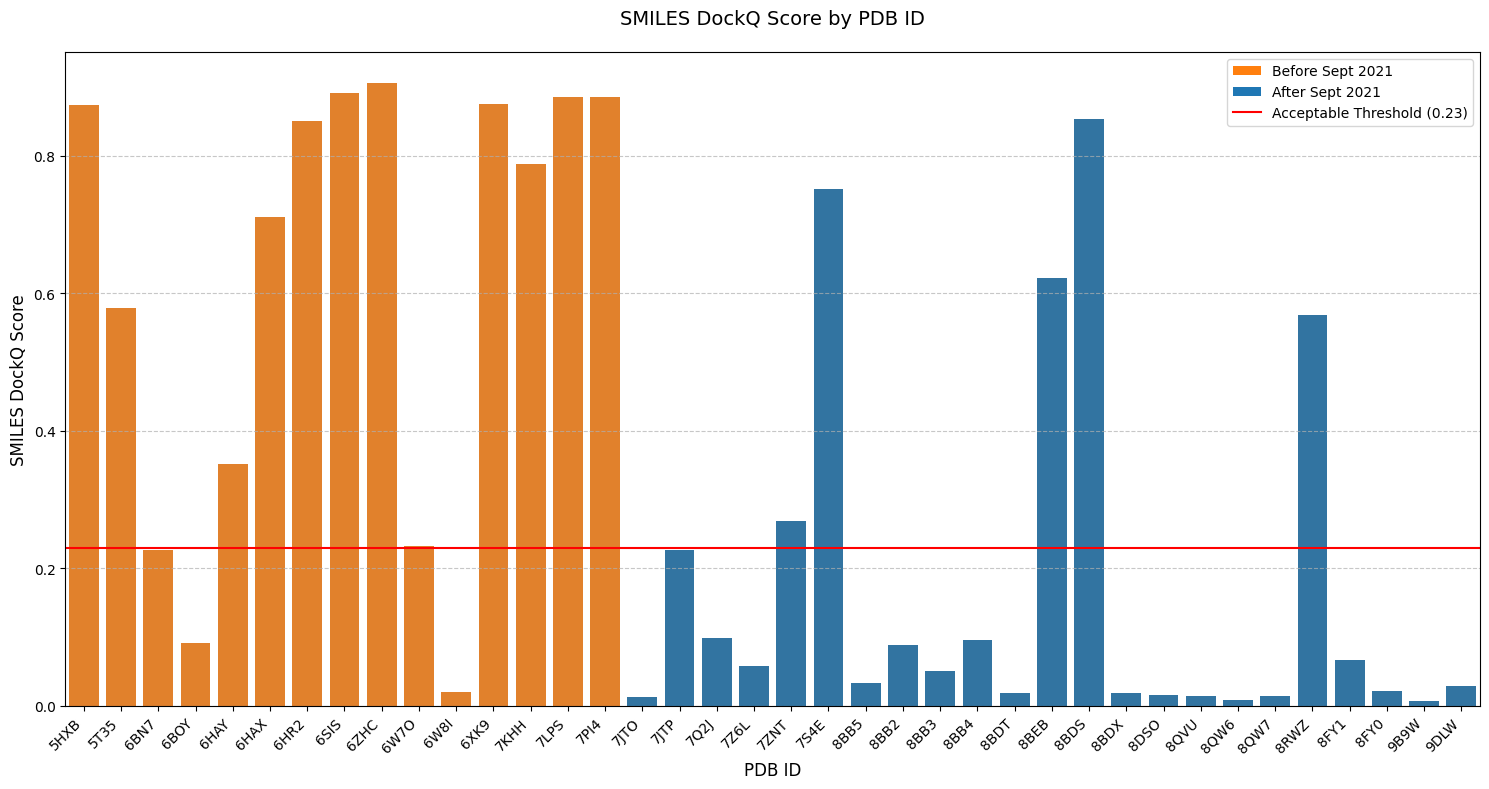

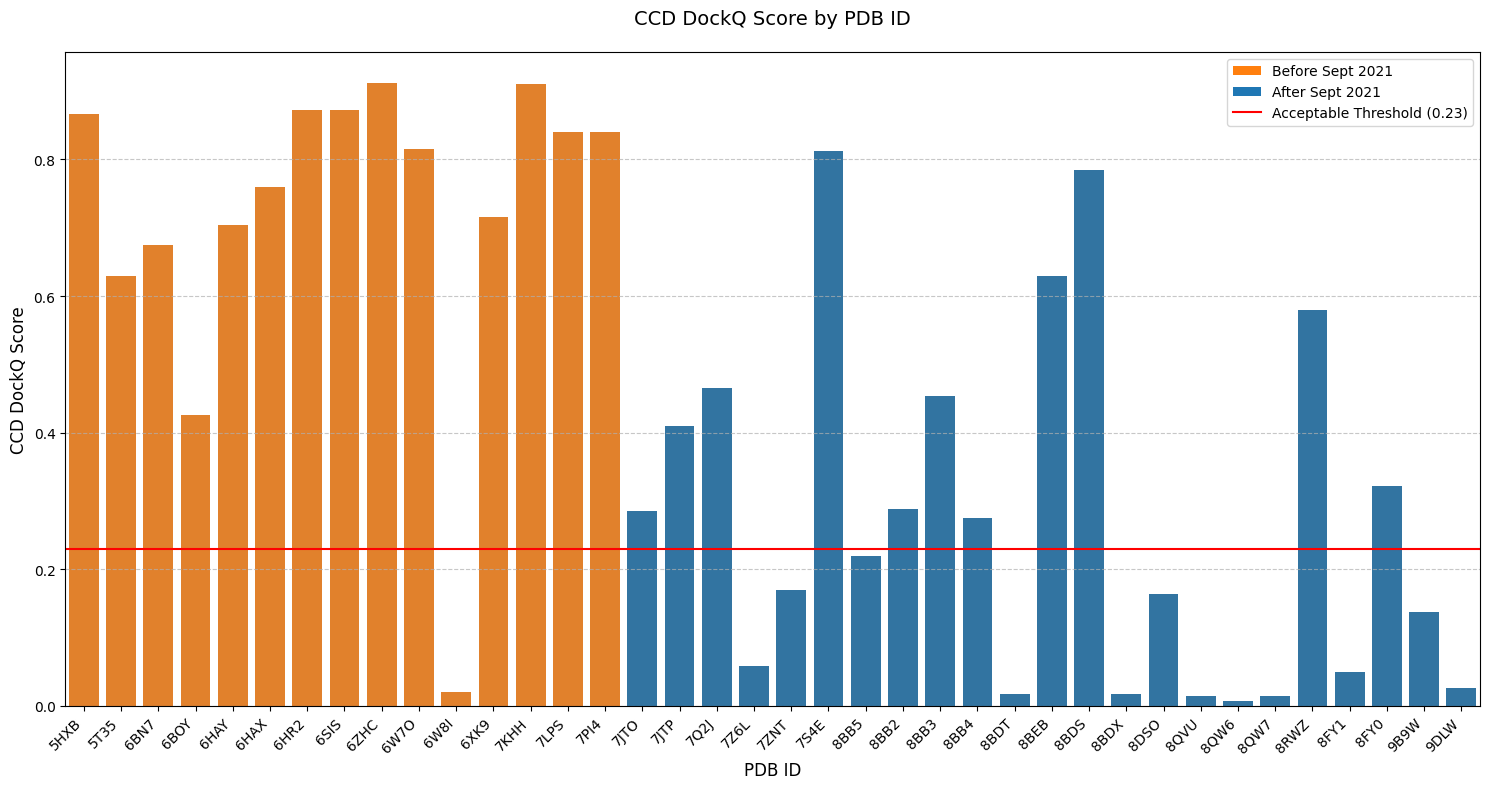

In [9]:
# For DockQ scores
plot_scores(smiles_dockq_df, 'SMILES DockQ Score', add_threshold=True, save=False)
plot_scores(ccd_dockq_df, 'CCD DockQ Score', add_threshold=True, save=False)

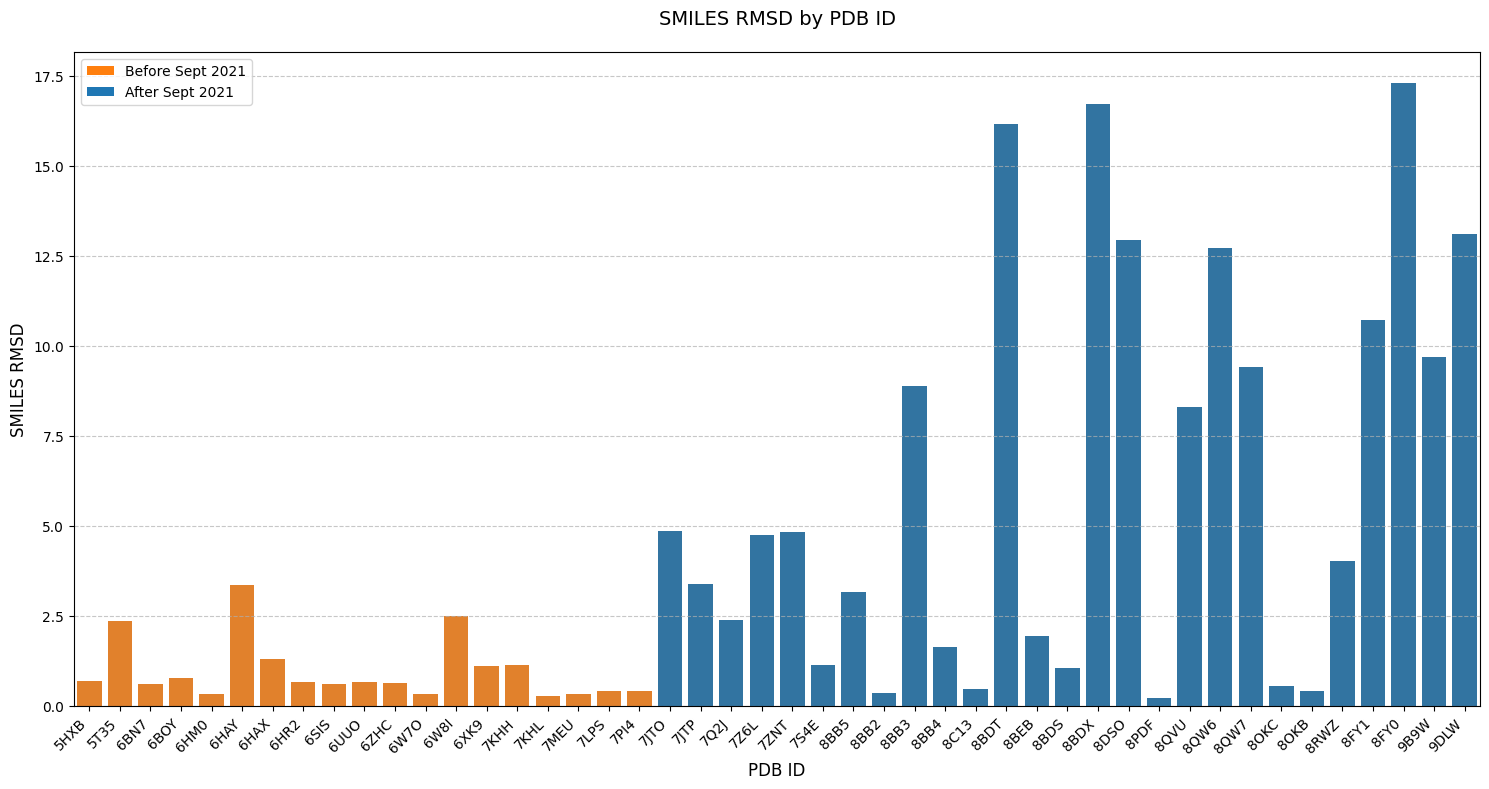

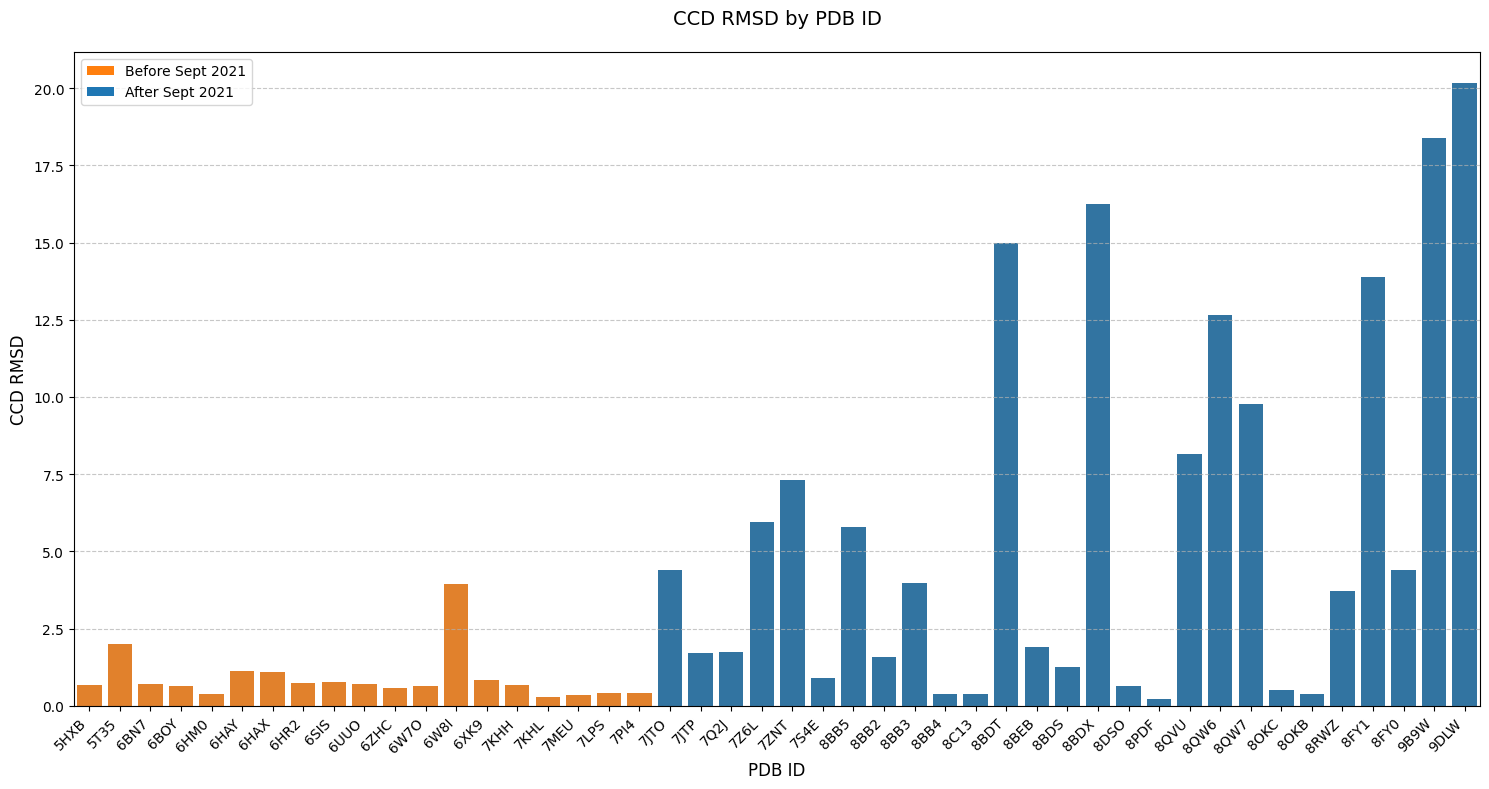

In [10]:
plot_scores(smiles_rmsd_df, 'SMILES RMSD', save=False)
plot_scores(ccd_rmsd_df, 'CCD RMSD', save=False)

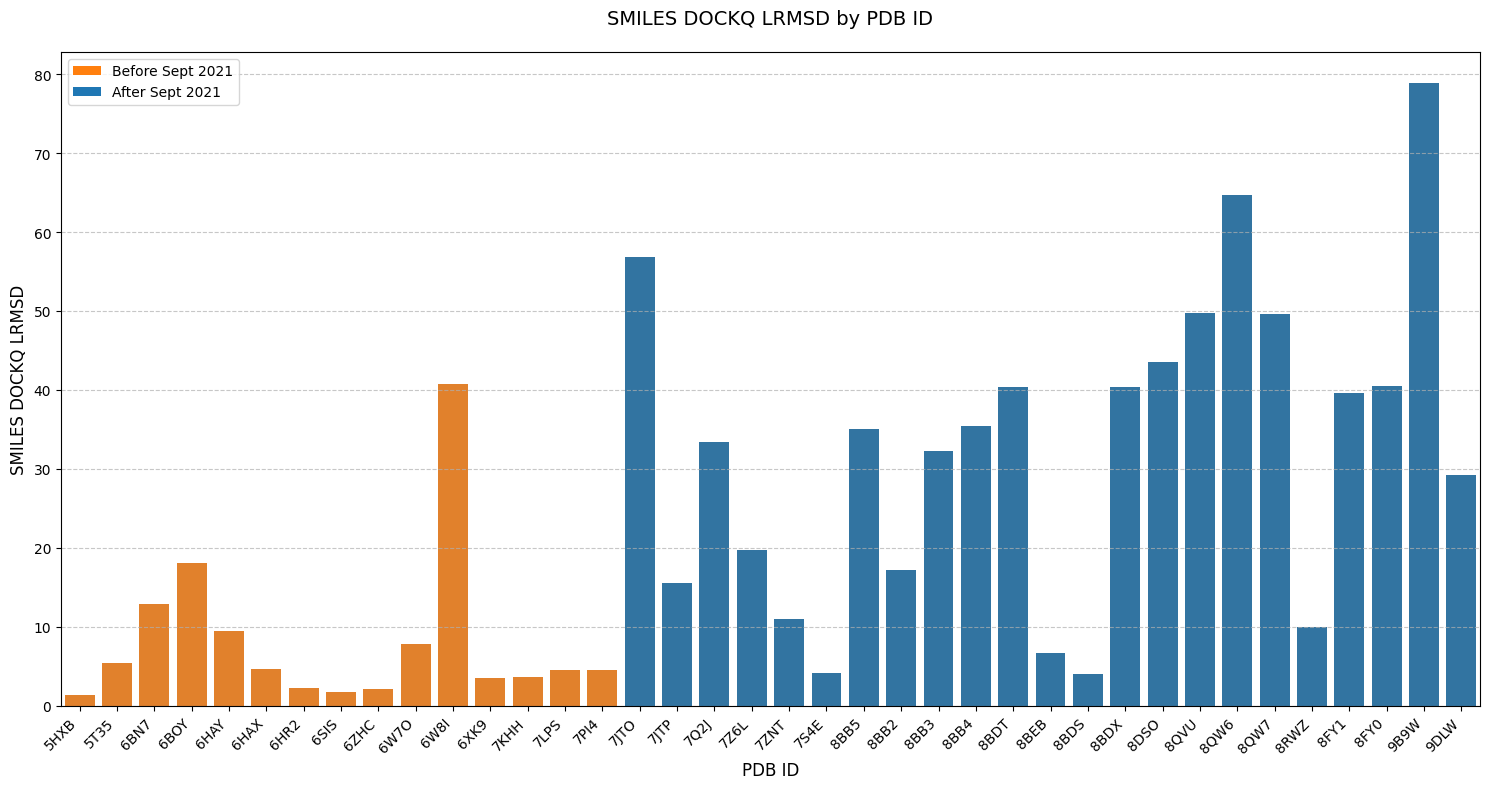

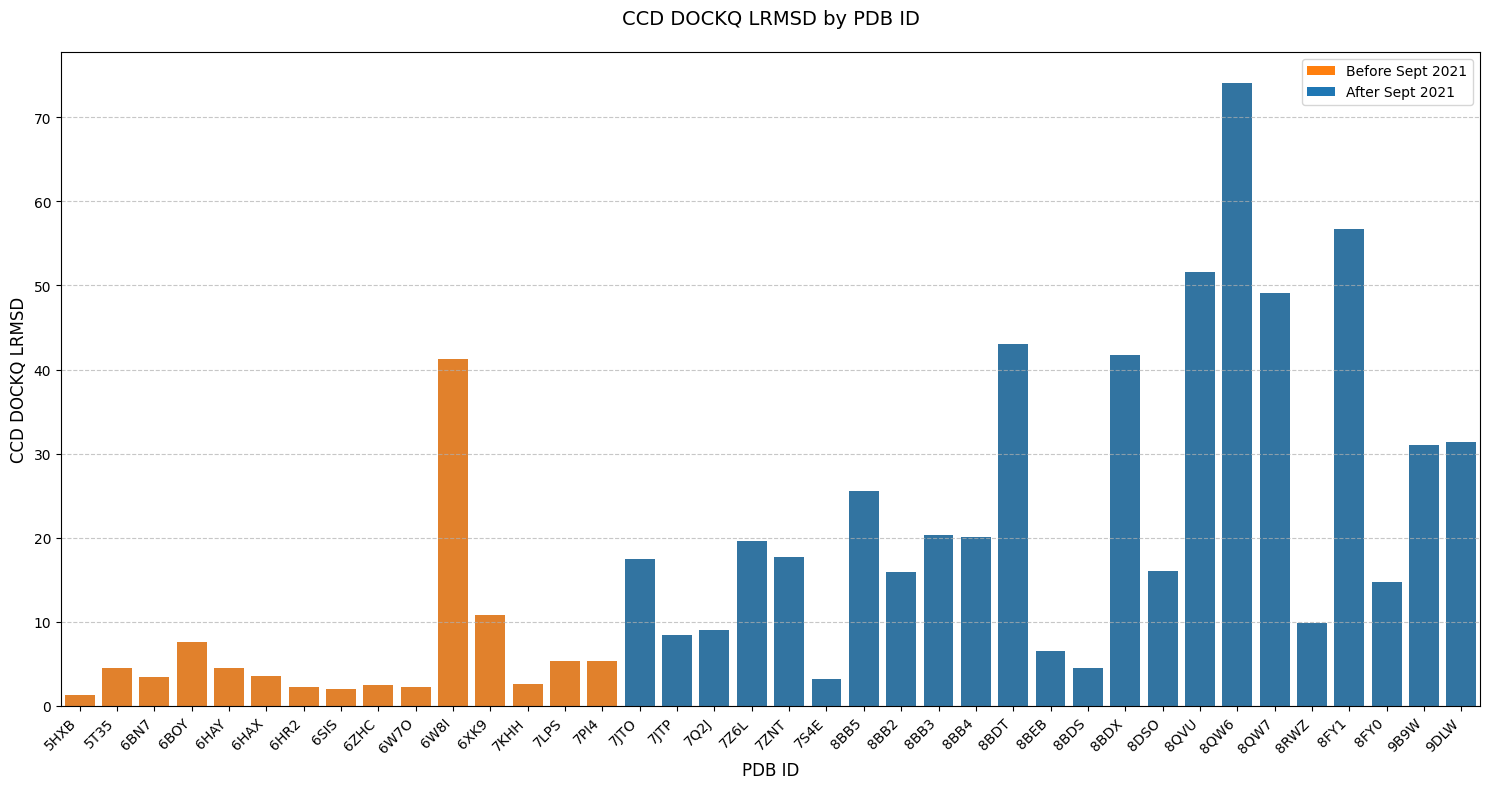

In [11]:
# For LRMSD scores
plot_scores(smiles_lrmsd_df, 'SMILES DOCKQ LRMSD', save=False)
plot_scores(ccd_lrmsd_df, 'CCD DOCKQ LRMSD', save=False)

## HAL Paper Results Comparasion

---

In [33]:
comparison_df = hal_df[['PDB_ID', 'PDB_RELEASE_DATE', 'AF3_DIMERS DOCKQ SCORE', 'AF3_DIMERS iRMSD', 'AF3_DIMERS LRMSD', 'AF3_CONTEXT DOCKQ SCORE', 'AF3_CONTEXT iRMSD', 'AF3_CONTEXT LRMSD']].copy()

# Merge CCD data
ccd_columns = ['PDB_ID', 'CCD DOCKQ SCORE', 'CCD DOCKQ iRMSD ', 'CCD DOCKQ LRMSD']
comparison_df = comparison_df.merge(df[ccd_columns], on='PDB_ID', how='left')

# Merge SMILES data
smiles_columns = ['PDB_ID', 'SMILES DOCKQ SCORE', 'SMILES DOCKQ iRMSD', 'SMILES DOCKQ LRMSD']
comparison_df = comparison_df.merge(df[smiles_columns], on='PDB_ID', how='left')


comparison_df.head()

,PDB_ID,PDB_RELEASE_DATE,AF3_DIMERS DOCKQ SCORE,AF3_DIMERS iRMSD,AF3_DIMERS LRMSD,AF3_CONTEXT DOCKQ SCORE,AF3_CONTEXT iRMSD,AF3_CONTEXT LRMSD,CCD DOCKQ SCORE,CCD DOCKQ iRMSD,CCD DOCKQ LRMSD,SMILES DOCKQ SCORE,SMILES DOCKQ iRMSD,SMILES DOCKQ LRMSD
0,5HXB,2016-06-29,0.840,0.848,2.165,0.027,12.608,42.404,0.867,0.783,1.286,0.874,0.785,1.411
1,5T35,2017-03-08,0.014,12.765,49.502,0.019,16.143,37.396,0.629,1.471,4.559,0.578,1.736,5.485
2,6BOY,2018-05-30,0.020,11.618,40.270,0.021,11.201,38.396,0.426,2.259,7.594,0.092,6.875,18.065
3,6HAX,2019-06-12,0.019,10.682,43.182,0.050,9.364,22.506,0.760,0.829,3.601,0.711,0.982,4.674
4,6HAY,2019-06-12,0.058,10.153,26.116,0.055,8.603,21.415,0.704,1.194,4.562,0.352,2.425,9.488
5,6HR2,2019-06-12,0.208,3.518,13.640,0.042,6.657,29.043,0.873,0.638,2.192,0.850,0.655,2.276
6,6BN7,2018-05-30,0.022,10.621,38.038,0.023,10.639,37.781,0.674,1.134,3.446,0.226,4.539,12.923
7,6W7O,2020-11-18,0.022,11.943,36.769,0.022,11.943,36.769,0.815,1.030,2.289,0.233,4.654,7.874
8,6W8I,2020-11-18,0.064,12.388,22.726,0.064,12.388,22.726,0.020,10.795,41.289,0.020,10.763,40.730
9,6XK9,2020-12-02,0.839,0.911,2.715,0.039,11.695,42.135,0.716,0.682,10.780,0.876,0.668,3.507


In [36]:
def plot_dockq_comparison(comparison_df, save=False, output_path=None):
    """
    Create a scatter plot comparing DockQ scores between different methods.
    
    Parameters:
    -----------
    comparison_df : pandas.DataFrame
        DataFrame containing columns:
        - PDB_ID
        - AF3_DIMERS DOCKQ SCORE
        - AF3_CONTEXT DOCKQ SCORE
        - CCD DOCKQ SCORE
        - SMILES DOCKQ SCORE
    save : bool, optional
        Whether to save the plot (default: False)
    output_path : str, optional
        Path where to save the plot if save=True
        
    Returns:
    --------
    matplotlib.figure.Figure
        The generated plot figure
    """
    plt.figure(figsize=(15, 8))
    
    # Plot each set of scores with different markers for HAL paper results
    methods = {
        'Dimers (no ligand)': ('AF3_DIMERS DOCKQ SCORE', '#FF0000', '^'),  # Red triangles
        'Context (no ligand)': ('AF3_CONTEXT DOCKQ SCORE', '#0000FF', '^'),  # Blue triangles
        'Ligand: CCD': ('CCD DOCKQ SCORE', '#228B22', 'o'),  # Green circles
        'Ligand: SMILES': ('SMILES DOCKQ SCORE', '#FF8C00', 'o')  # Orange circles
    }
    
    for label, (column, color, marker) in methods.items():
        plt.scatter(range(len(comparison_df)), comparison_df[column], 
                   color=color, label=label, alpha=1.0, s=60, marker=marker)
    
    # Add the threshold line
    plt.axhline(y=0.23, color='black', linestyle='-', alpha=0.7, linewidth=2.5)
    
    # Create PDB ID labels with asterisks for dates after Sept 2021
    cutoff_date = pd.to_datetime('2021-09-30')
    pdb_labels = [f"{pdb}*" if pd.to_datetime(date) > cutoff_date else pdb 
                 for pdb, date in zip(comparison_df['PDB_ID'], comparison_df['PDB_RELEASE_DATE'])]
    
    plt.title('AlphaFold3 PROTAC Prediction Comparison', 
              fontsize=16, pad=20, weight='bold')
    plt.ylabel('DockQ', fontsize=14, weight='bold')
    plt.xlabel('PDB ID', fontsize=14, weight='bold')
    plt.ylim(0, 1.0)
    
    # Add x-axis labels with asterisks
    plt.xticks(range(len(comparison_df)), pdb_labels, 
               rotation=45, ha='right', fontsize=10)
    
    # Add legend for methods and asterisk
    handles, labels = plt.gca().get_legend_handles_labels()
    asterisk_handle = Line2D([0], [0], marker='*', color='w', 
                            markerfacecolor='black', markersize=10, 
                            label='After Sept 2021')
    handles.append(asterisk_handle)
    
    plt.legend(handles=handles, loc='upper right', fontsize=10, framealpha=0.9)
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.2)
    
    if save and output_path:
        plt.savefig(output_path, dpi=300, bbox_inches='tight')
    
    return plt.gcf()

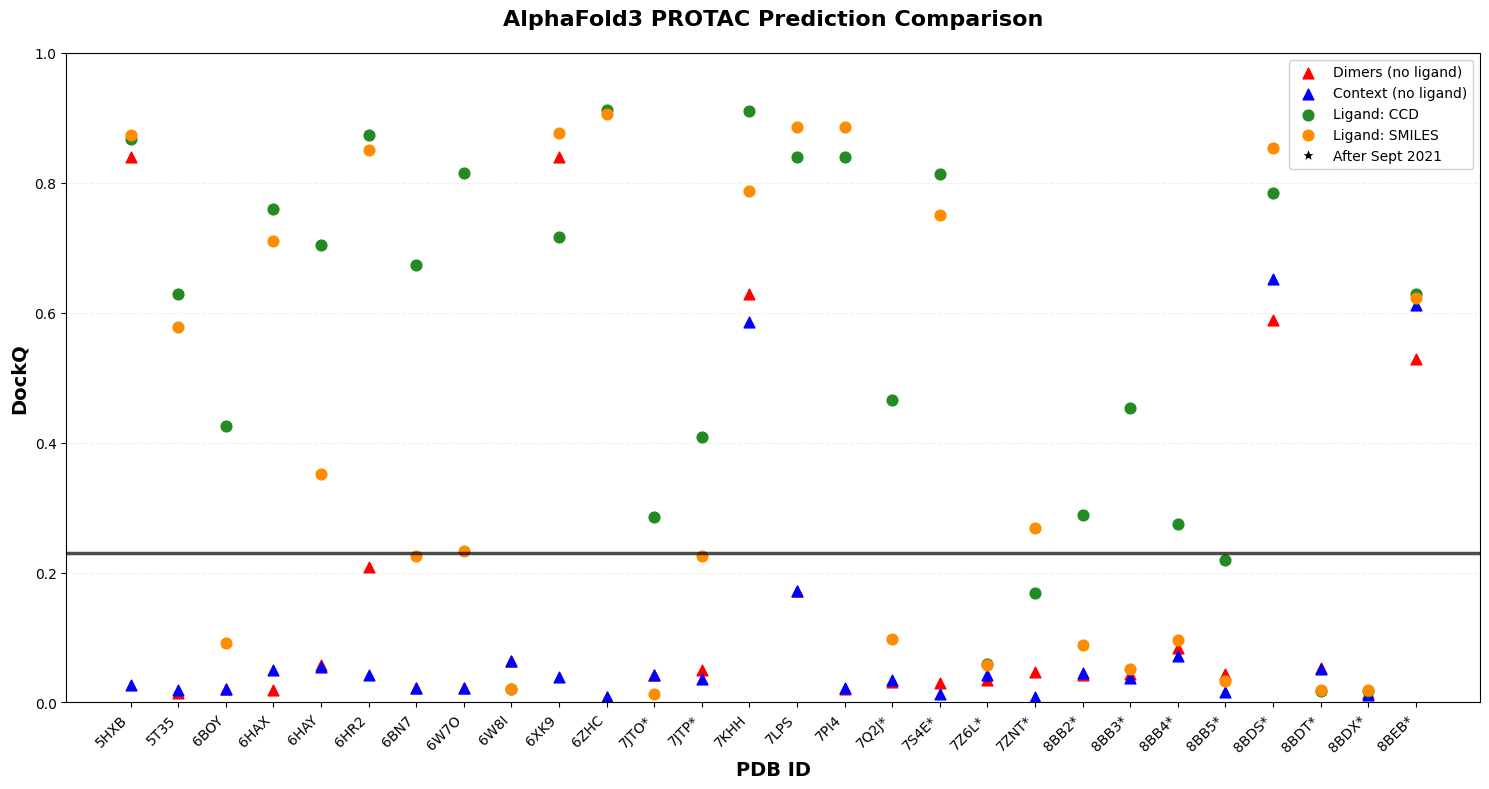

In [38]:
fig = plot_dockq_comparison(comparison_df)
plt.show()